# Credit Card Fraud Detection::

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [99]:
df=pd.read_csv('drive/MyDrive/creditcard.csv')

In [100]:
data=df.copy()
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [102]:
data=data.sample(frac=1) # shuffling data

In [103]:
 x=data.drop("Class",axis=1).copy()
 y=data['Class']

In [104]:
train_data,test_data,train_target,test_target=train_test_split(x,y,test_size=.30,random_state=30)

In [105]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [106]:
partial_train_data,val_data,partial_train_target,val_target=train_test_split(train_data,train_target,test_size=.20,random_state=30)

In [107]:
val_data.shape

(39873, 30)

In [119]:
model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(30,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss="binary_crossentropy",metrics=['accuracy'])

In [120]:
history=model.fit(partial_train_data,partial_train_target,epochs=100,batch_size=512,validation_data=(val_data,val_target))

Epoch 1/100
312/312 [==============================] - 1s 3ms/step - loss: 0.1991 - accuracy: 0.9978 - val_loss: 0.0061 - val_accuracy: 0.9981
Epoch 2/100
312/312 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 3/100
312/312 [==============================] - 1s 2ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 4/100
312/312 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 5/100
312/312 [==============================] - 1s 2ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 6/100
312/312 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 7/100
312/312 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993

In [121]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

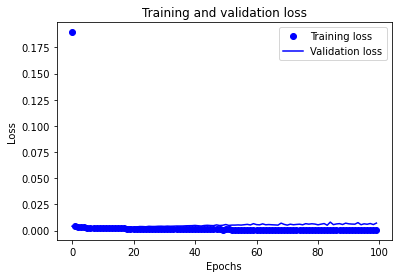

In [122]:
## cheking for loss graph
loss_values = history_dic['loss']
val_loss_values = history_dic['val_loss']
epochs = range(len(loss_values))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

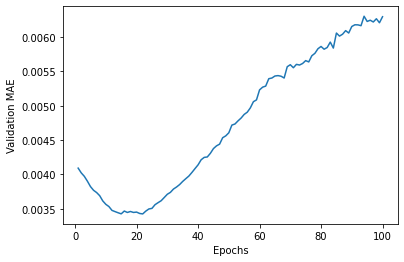

In [123]:
#making graph understandable
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(val_loss_values)
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [124]:
model2=Sequential()
model2.add(Dense(16,activation='relu',input_shape=(30,)))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='rmsprop',loss="binary_crossentropy",metrics=['accuracy'])

In [125]:
model2.fit(train_data,train_target,epochs=20,batch_size=256)

Epoch 1/20
779/779 [==============================] - 1s 1ms/step - loss: 0.1588 - accuracy: 0.9623
Epoch 2/20
779/779 [==============================] - 1s 1ms/step - loss: 0.0044 - accuracy: 0.9991
Epoch 3/20
779/779 [==============================] - 1s 1ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/20
779/779 [==============================] - 1s 1ms/step - loss: 0.0039 - accuracy: 0.9994
Epoch 5/20
779/779 [==============================] - 1s 1ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 6/20
779/779 [==============================] - 1s 1ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 7/20
779/779 [==============================] - 1s 1ms/step - loss: 0.0031 - accuracy: 0.9995
Epoch 8/20
779/779 [==============================] - 1s 1ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 9/20
779/779 [==============================] - 1s 1ms/step - loss: 0.0028 - accuracy: 0.9995
Epoch 10/20
779/779 [==============================] - 1s 1ms/step - loss: 0.0025 - accuracy: 0.9995

In [126]:
model2.evaluate(test_data,test_target)

2671/2671 [==============================] - 2s 887us/step - loss: 0.0029 - accuracy: 0.9995


[0.0029219132848083973, 0.9994616508483887]

In [127]:
model2.predict(test_data).sum()

141.365

In [128]:
test_data.shape

(85443, 30)

In [129]:
141*100/85443

0.1650222955654647